In [89]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [90]:
plr_stats = pd.read_csv(
    '../data/NBA_Seasonal_stats/nba_season_player_stats.csv')
plr_info = pd.read_csv('../data/NBA_statistics/Players.csv')

In [91]:
plr_stats.head()

,player_id,player_name,season_id,team_id,team_abbreviation,league_id,gp,gs,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,tov,pf,pts
0,76001,Alaa Abdelnaby,1990-91,1610612757,POR,23.0,43,0.0,290.0,55,116,0.474,0.0,0.0,0.0,25,44,0.568,27.0,62.0,89.0,12,4.0,12.0,22.0,39,135
1,76001,Alaa Abdelnaby,1991-92,1610612757,POR,24.0,71,1.0,934.0,178,361,0.493,0.0,0.0,0.0,76,101,0.752,81.0,179.0,260.0,30,25.0,16.0,66.0,132,432
2,76001,Alaa Abdelnaby,1992-93,0,TOT,25.0,75,52.0,1311.0,245,473,0.518,0.0,1.0,0.0,88,116,0.759,126.0,211.0,337.0,27,25.0,26.0,97.0,189,578
3,76001,Alaa Abdelnaby,1993-94,1610612738,BOS,26.0,13,0.0,159.0,24,55,0.436,0.0,0.0,0.0,16,25,0.640,12.0,34.0,46.0,3,2.0,3.0,17.0,20,64
4,76001,Alaa Abdelnaby,1994-95,0,TOT,27.0,54,0.0,506.0,118,231,0.511,0.0,2.0,0.0,20,35,0.571,37.0,77.0,114.0,13,15.0,12.0,45.0,104,256


In [92]:
plr_info.head()

,personId,firstName,lastName,birthdate,lastAttended,country,height,bodyWeight,guard,forward,center,draftYear,draftRound,draftNumber
0,2,Byron,Scott,1961-03-28,Arizona State,USA,76.0,205.0,True,False,False,1983.0,1.0,4.0
1,3,Grant,Long,1966-03-12,Eastern Michigan,USA,81.0,3.0,False,False,False,1988.0,2.0,33.0
2,7,Dan,Schayes,1959-05-10,Syracuse,USA,83.0,260.0,False,False,True,1981.0,1.0,13.0
3,9,Sedale,Threatt,1961-09-10,West Virginia Tech,USA,74.0,185.0,True,False,False,1983.0,6.0,139.0
4,12,Chris,King,1969-07-24,Wake Forest,USA,80.0,215.0,False,True,False,1992.0,2.0,45.0


Data Cleaning

In [93]:
# player stats df

plr_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25167 entries, 0 to 25166
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_id          25167 non-null  int64  
 1   player_name        25167 non-null  object 
 2   season_id          25167 non-null  object 
 3   team_id            25167 non-null  int64  
 4   team_abbreviation  25167 non-null  object 
 5   league_id          25167 non-null  float64
 6   gp                 25167 non-null  int64  
 7   gs                 19613 non-null  float64
 8   min                24398 non-null  float64
 9   fgm                25167 non-null  int64  
 10  fga                25167 non-null  int64  
 11  fg_pct             25153 non-null  float64
 12  fg3m               19967 non-null  float64
 13  fg3a               19967 non-null  float64
 14  fg3_pct            19745 non-null  float64
 15  ftm                25167 non-null  int64  
 16  fta                251

In [94]:
plr_stats['season_id'] = plr_stats['season_id'].str[:-3].astype(int)

In [95]:
# Calculate per-game averages for all relevant stats in plr_stats
stats_columns = [
    'pts', 'ast', 'blk', 'stl', 'fga', 'fgm', 'fg3a', 'fg3m', 'fta', 'ftm',
    'oreb', 'dreb', 'reb', 'pf', 'tov', 'min'
]

for col in stats_columns:
    per_game_col = f"{col}_pg"
    plr_stats[per_game_col] = plr_stats[col] / plr_stats['gp']

In [96]:
plr_stats.head()

,player_id,player_name,season_id,team_id,team_abbreviation,league_id,gp,gs,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,pts_pg,ast_pg,blk_pg,stl_pg,fga_pg,fgm_pg,fg3a_pg,fg3m_pg,fta_pg,ftm_pg,oreb_pg,dreb_pg,reb_pg,pf_pg,tov_pg,min_pg
0,76001,Alaa Abdelnaby,1990,1610612757,POR,23.0,43,0.0,290.0,55,116,0.474,0.0,0.0,0.0,25,44,0.568,27.0,62.0,89.0,12,4.0,12.0,22.0,39,135,3.139535,0.279070,0.279070,0.093023,2.697674,1.279070,0.000000,0.0,1.023256,0.581395,0.627907,1.441860,2.069767,0.906977,0.511628,6.744186
1,76001,Alaa Abdelnaby,1991,1610612757,POR,24.0,71,1.0,934.0,178,361,0.493,0.0,0.0,0.0,76,101,0.752,81.0,179.0,260.0,30,25.0,16.0,66.0,132,432,6.084507,0.422535,0.225352,0.352113,5.084507,2.507042,0.000000,0.0,1.422535,1.070423,1.140845,2.521127,3.661972,1.859155,0.929577,13.154930
2,76001,Alaa Abdelnaby,1992,0,TOT,25.0,75,52.0,1311.0,245,473,0.518,0.0,1.0,0.0,88,116,0.759,126.0,211.0,337.0,27,25.0,26.0,97.0,189,578,7.706667,0.360000,0.346667,0.333333,6.306667,3.266667,0.013333,0.0,1.546667,1.173333,1.680000,2.813333,4.493333,2.520000,1.293333,17.480000
3,76001,Alaa Abdelnaby,1993,1610612738,BOS,26.0,13,0.0,159.0,24,55,0.436,0.0,0.0,0.0,16,25,0.640,12.0,34.0,46.0,3,2.0,3.0,17.0,20,64,4.923077,0.230769,0.230769,0.153846,4.230769,1.846154,0.000000,0.0,1.923077,1.230769,0.923077,2.615385,3.538462,1.538462,1.307692,12.230769
4,76001,Alaa Abdelnaby,1994,0,TOT,27.0,54,0.0,506.0,118,231,0.511,0.0,2.0,0.0,20,35,0.571,37.0,77.0,114.0,13,15.0,12.0,45.0,104,256,4.740741,0.240741,0.222222,0.277778,4.277778,2.185185,0.037037,0.0,0.648148,0.370370,0.685185,1.425926,2.111111,1.925926,0.833333,9.370370


In [97]:
plr_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25167 entries, 0 to 25166
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_id          25167 non-null  int64  
 1   player_name        25167 non-null  object 
 2   season_id          25167 non-null  int64  
 3   team_id            25167 non-null  int64  
 4   team_abbreviation  25167 non-null  object 
 5   league_id          25167 non-null  float64
 6   gp                 25167 non-null  int64  
 7   gs                 19613 non-null  float64
 8   min                24398 non-null  float64
 9   fgm                25167 non-null  int64  
 10  fga                25167 non-null  int64  
 11  fg_pct             25153 non-null  float64
 12  fg3m               19967 non-null  float64
 13  fg3a               19967 non-null  float64
 14  fg3_pct            19745 non-null  float64
 15  ftm                25167 non-null  int64  
 16  fta                251

In [ ]:
plr_stats['reb'] = plr_stats['oreb'] + plr_stats['dreb']
plr_stats['reb_pg'] = plr_stats['reb'] / plr_stats['gp']

In [77]:
plr_stats = plr_stats.rename({'season_id': 'season'})

In [78]:
plr_stats = plr_stats.drop(['league_id'], axis=1)

In [79]:
import numpy as np


def calc_ts(pts, fga, fta):
    denom = 2 * (fga + (0.44 * fta))
    # Avoid division by zero or NaN
    return np.where(denom == 0, np.nan, pts / denom)

In [80]:
plr_stats['ts_pct'] = calc_ts(
    plr_stats['pts'], plr_stats['fga'], plr_stats['fta'])

In [81]:
plr_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25167 entries, 0 to 25166
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_id          25167 non-null  int64  
 1   player_name        25167 non-null  object 
 2   season_id          25167 non-null  int64  
 3   team_id            25167 non-null  int64  
 4   team_abbreviation  25167 non-null  object 
 5   gp                 25167 non-null  int64  
 6   gs                 19613 non-null  float64
 7   min                24398 non-null  float64
 8   fgm                25167 non-null  int64  
 9   fga                25167 non-null  int64  
 10  fg_pct             25153 non-null  float64
 11  fg3m               19967 non-null  float64
 12  fg3a               19967 non-null  float64
 13  fg3_pct            19745 non-null  float64
 14  ftm                25167 non-null  int64  
 15  fta                25167 non-null  int64  
 16  ft_pct             25048 no

In [82]:
# player info df

plr_info['player_name'] = plr_info['firstName'] + ' ' + plr_info['lastName']
plr_info = plr_info.drop(columns=['firstName', 'lastName'])

In [83]:
plr_info['birthdate'] = pd.to_datetime(plr_info['birthdate'])

In [84]:
plr_info = plr_info[['player_name', 'height', 'bodyWeight']]

In [85]:
plr_info.head()

,player_name,height,bodyWeight
0,Byron Scott,76.0,205.0
1,Grant Long,81.0,3.0
2,Dan Schayes,83.0,260.0
3,Sedale Threatt,74.0,185.0
4,Chris King,80.0,215.0


In [86]:
df = pd.merge(plr_stats, plr_info, on='player_name', how='inner')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26032 entries, 0 to 26031
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_id          26032 non-null  int64  
 1   player_name        26032 non-null  object 
 2   season_id          26032 non-null  int64  
 3   team_id            26032 non-null  int64  
 4   team_abbreviation  26032 non-null  object 
 5   gp                 26032 non-null  int64  
 6   gs                 20381 non-null  float64
 7   min                25262 non-null  float64
 8   fgm                26032 non-null  int64  
 9   fga                26032 non-null  int64  
 10  fg_pct             26018 non-null  float64
 11  fg3m               20743 non-null  float64
 12  fg3a               20743 non-null  float64
 13  fg3_pct            20511 non-null  float64
 14  ftm                26032 non-null  int64  
 15  fta                26032 non-null  int64  
 16  ft_pct             259

-----------------------------

--- Train Seperate Models Here ---

--------------------------------------------

In [98]:
target = 'blk_pg'

df_less = df[['reb_pg', 'gp', 'gs', 'pts_pg', 'ast_pg', 'blk_pg', 'fga_pg', 'height',
              'bodyWeight', 'fg3a_pg', 'fta_pg', 'tov_pg', 'min_pg', 'ts_pct']]


already_done = ['reb_pg', 'gp', 'gs', 'pts_pg', 'ast_pg', 'fga_pg',
                'height', 'bodyWeight', 'fg3a_pg', 'fta_pg', 'tov_pg', 'min_pg', 'ts_pct', ]

if target not in df_less.columns:
    raise IndexError(f'{target} is not in the Data Frame')
elif target in already_done:
    raise ValueError(f'{target} is already done')

In [99]:
df_less.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26032 entries, 0 to 26031
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   reb_pg      22342 non-null  float64
 1   gp          26032 non-null  int64  
 2   gs          20381 non-null  float64
 3   pts_pg      26032 non-null  float64
 4   ast_pg      26032 non-null  float64
 5   blk_pg      22342 non-null  float64
 6   fga_pg      26032 non-null  float64
 7   height      22340 non-null  float64
 8   bodyWeight  22410 non-null  float64
 9   fg3a_pg     20743 non-null  float64
 10  fta_pg      26032 non-null  float64
 11  tov_pg      21325 non-null  float64
 12  min_pg      25262 non-null  float64
 13  ts_pct      25952 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 2.8 MB


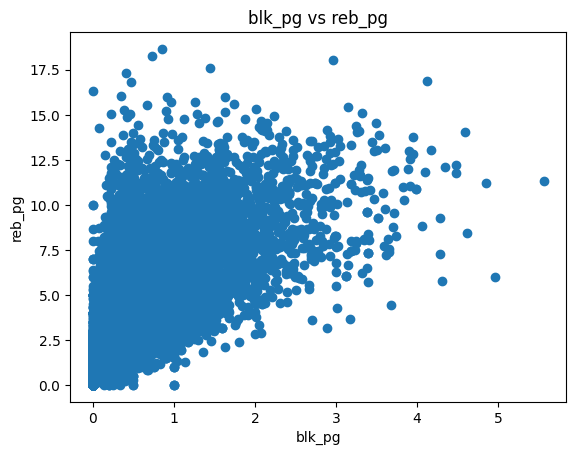

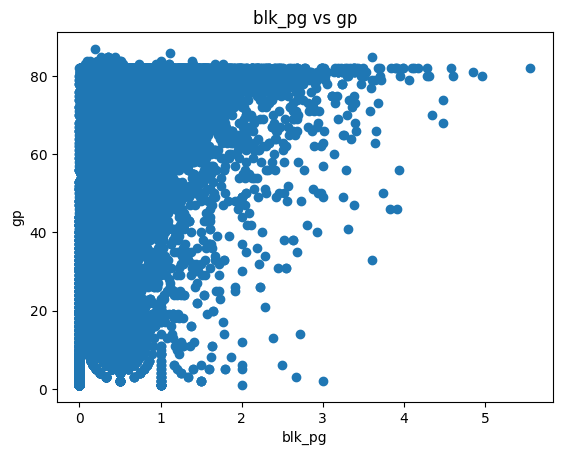

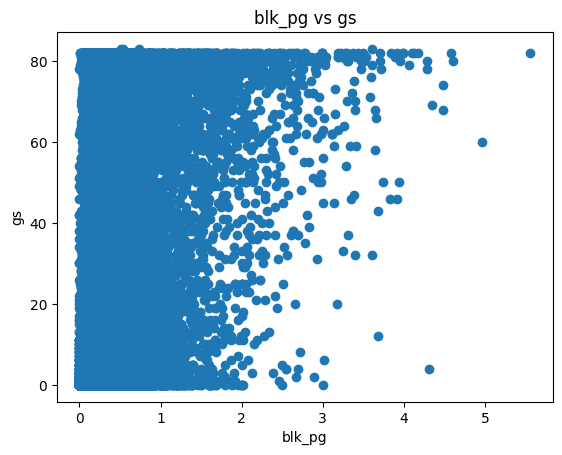

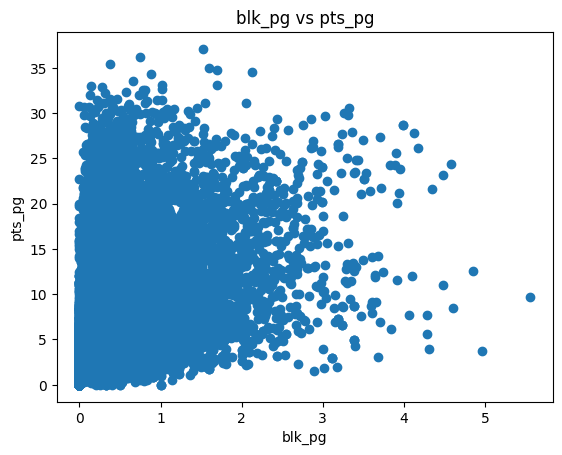

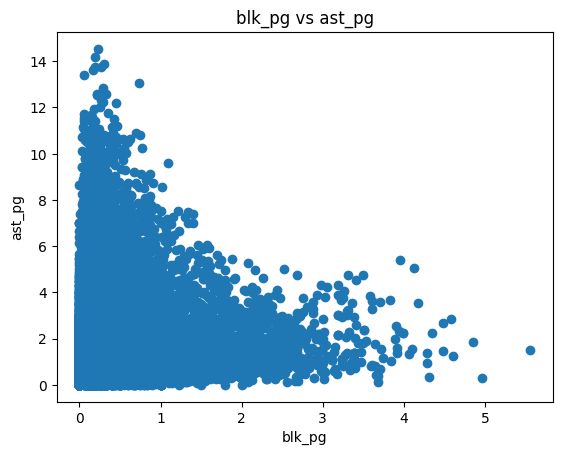

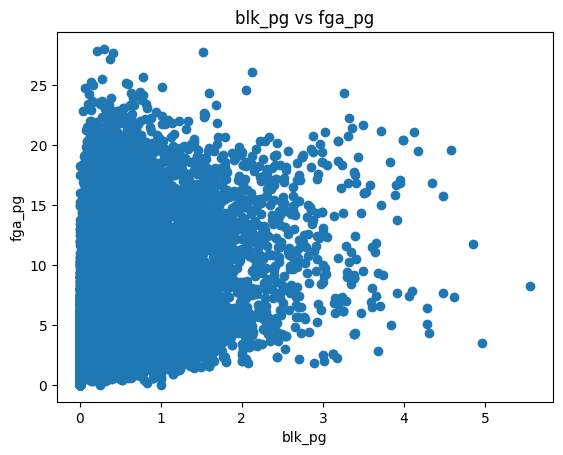

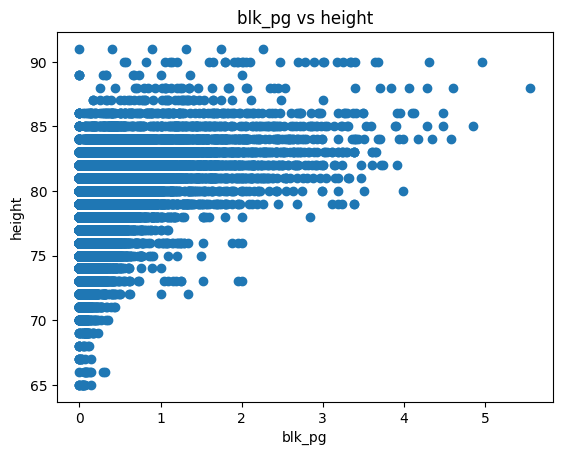

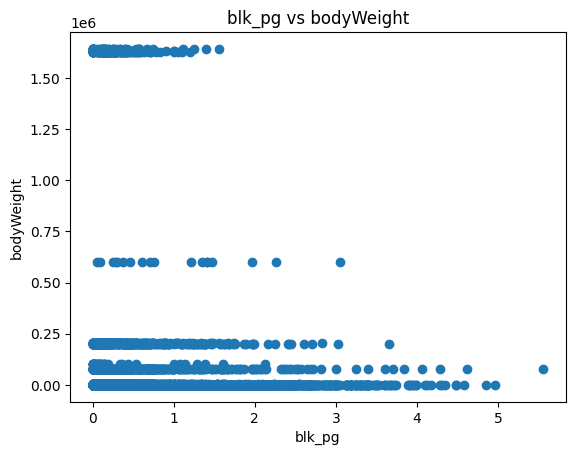

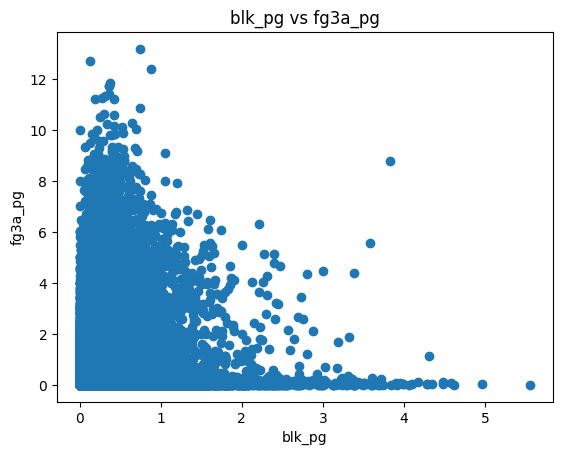

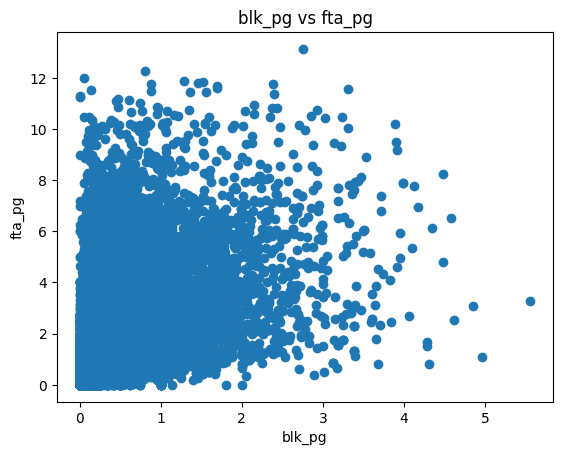

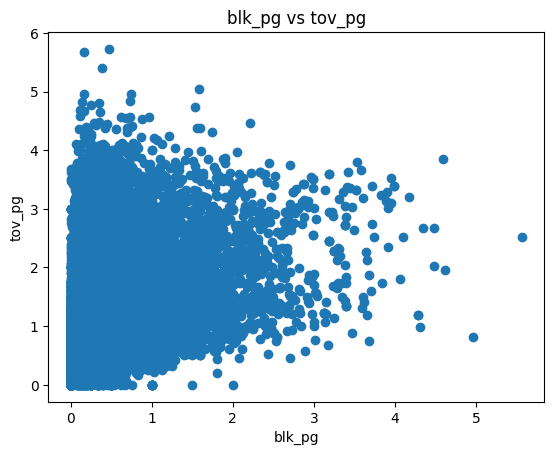

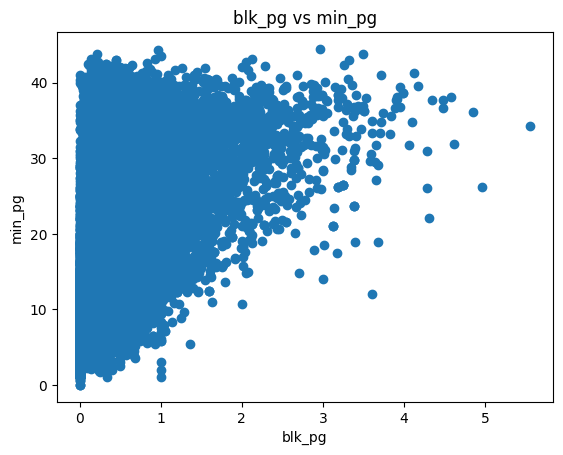

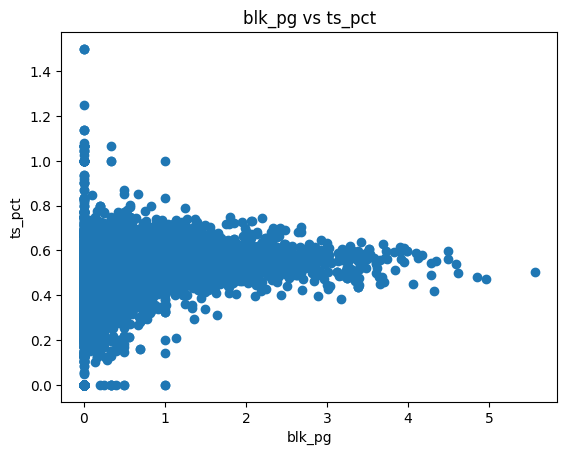

In [100]:
import matplotlib.pyplot as plt

for col in df_less.columns:
    if col == target or df_less[col].dtype == object:
        continue
    else:
        plt.scatter(df_less[target], df_less[col])
        plt.xlabel(target)
        plt.ylabel(col)
        plt.title(f'{target} vs {col}')
        plt.show()

In [101]:
from sklearn.model_selection import train_test_split

# PPG Model

X, y = df_less.drop([target], axis=1), df_less[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [102]:
# Pipline

from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from xgboost import XGBRegressor

estimators = [
    ('encoder', TargetEncoder()),
    ('clf', XGBRegressor(random_state=42))
]

pipe = Pipeline(steps=estimators)

In [103]:
pipe

,steps,"[('encoder', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,verbose,0
,cols,None
,drop_invariant,False
,return_df,True
,handle_missing,'value'
,handle_unknown,'value'
,min_samples_leaf,20


In [104]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
    'clf__max_depth': Integer(2, 8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode': Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}

opt = BayesSearchCV(pipe, search_space, cv=5, n_iter=20,
                    scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

In [105]:
# Fill missing values in y_train and y_test
if y_train.isnull().sum() > 0:
    y_train = y_train.fillna(y_train.mean())
if y_test.isnull().sum() > 0:
    y_test = y_test.fillna(y_train.mean())  # Use train mean for test set

opt.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

,estimator,"Pipeline(step...=None, ...))])"
,search_spaces,"{'clf__colsample_bylevel': Real(low=0.5,...m='normalize'), 'clf__colsample_bynode': Real(low=0.5,...m='normalize'), 'clf__colsample_bytree': Real(low=0.5,...m='normalize'), 'clf__gamma': Real(low=0.0,...m='normalize'), ...}"
,optimizer_kwargs,None
,n_iter,20
,scoring,'neg_mean_squared_error'
,fit_params,None
,n_jobs,-1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,5


In [106]:
opt.best_estimator_

,steps,"[('encoder', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,verbose,0
,cols,[]
,drop_invariant,False
,return_df,True
,handle_missing,'value'
,handle_unknown,'value'
,min_samples_leaf,20


In [107]:
opt.best_score_

np.float64(-0.07753583595381577)

In [108]:
opt.score(X_test, y_test)

-0.0742795254841372

In [109]:
y_pred = opt.predict(X_test)
y_pred

array([0.11187331, 0.0860792 , 0.6851148 , ..., 0.4212621 , 0.20763546,
       0.40369558], shape=(6508,), dtype=float32)

In [110]:
opt.best_estimator_.steps

[('encoder', TargetEncoder(cols=[])),
 ('clf',
  XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=0.5, colsample_bynode=1.0, colsample_bytree=1.0,
               device=None, early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=0.0, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.2781610806827655,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=8, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, ...))]

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

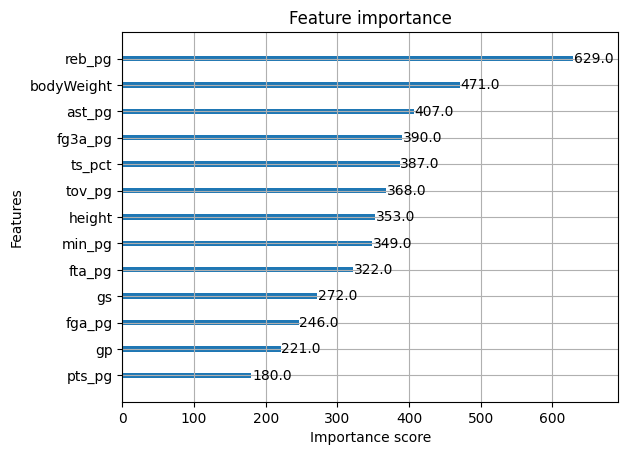

In [111]:
from xgboost import plot_importance
xgboost_step = opt.best_estimator_.steps[1]
model = xgboost_step[1]
plot_importance(model)

In [112]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2:.2f}")

R² score: 0.66


In [ ]:
player_stats = {
    'reb_pg': 7.5,
    'gp': 82,
    'gs': 82,
    'pts_pg': 25.3,
    'ast_pg': 6.1,
    'blk_pg': 1.2,
    'fga_pg': 18.7,
    'height': 79,         # in inches (6'7")
    'bodyWeight': 220,    # in pounds
    'fg3a_pg': 7.2,
    'fta_pg': 6.5,
    'tov_pg': 2.9,
    'min_pg': 35.4,
}

total_pts = player_stats['pts_pg'] * player_stats['gp']
total_fga = player_stats['fga_pg'] * player_stats['gp']
total_fta = player_stats['fta_pg'] * player_stats['gp']

player_stats['ts_pct'] = float(calc_ts(total_pts, total_fga, total_fta))
player_stats['ts_pct'] = pd.to_numeric(player_stats['ts_pct'], errors='coerce')


newdf = pd.DataFrame([player_stats]).drop([target], axis=1)

pred = model.predict(newdf)[0]

print(f'Prediction for new data is {pred:.2f} {target}')

Prediction for new data is 0.51 blk_pg


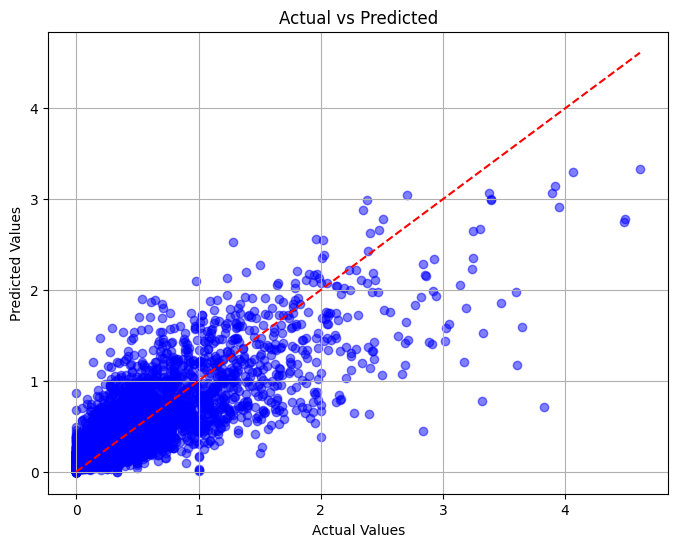

In [116]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [
         y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

In [117]:
import joblib

model_file_path = '../models/Basic'
model_file_name = f'/{target}_model.pkl'
file_path = model_file_path + model_file_name

joblib.dump(value=[model, r2], filename=file_path)

['../models/Basic/blk_pg_model.pkl']

In [118]:
import joblib
from pathlib import Path

model_dir = Path('../models/Basic')
model_files = list(model_dir.glob('*_model.pkl'))

results = []

for file_path in model_files:
    try:
        loaded = joblib.load(file_path)
        if isinstance(loaded, list) and len(loaded) == 2:
            model, r2 = loaded
            results.append((file_path.name, r2))
            print(f"Loaded {file_path.name} with R2: {r2}")
        else:
            print(f"{file_path.name} does not contain [model, r2] format")
    except Exception as e:
        print(f"Failed to load {file_path.name}: {e}")

# Sort by r2 ascending (lowest first)
results.sort(key=lambda x: x[1])

print("\nTop 10 models with lowest R2 scores:")
for name, score in results[:10]:
    print(f"{name}: {score:.4f}")

Loaded ast_pg_model.pkl with R2: 0.8404831690185723
Loaded blk_pg_model.pkl with R2: 0.6593893401509765
Loaded fg3a_pg_model.pkl with R2: 0.6930533563184514
Loaded fga_pg_model.pkl with R2: 0.993231063156609
Loaded fta_pg_model.pkl with R2: 0.9163842474755011
Loaded gp_model.pkl with R2: 0.7099802494049072
Loaded gs_model.pkl with R2: 0.8280407130751323
Loaded height_model.pkl with R2: 0.7658951146454576
Loaded min_pg_model.pkl with R2: 0.9352130995368398
Loaded pts_pg_model.pkl with R2: 0.9981663126054079
Loaded reb_pg_model.pkl with R2: 0.812180391822453
Loaded tov_pg_model.pkl with R2: 0.8387658887275904
Loaded ts_pct_model.pkl with R2: 0.8091180648441239

Top 10 models with lowest R2 scores:
blk_pg_model.pkl: 0.6594
fg3a_pg_model.pkl: 0.6931
gp_model.pkl: 0.7100
height_model.pkl: 0.7659
ts_pct_model.pkl: 0.8091
reb_pg_model.pkl: 0.8122
gs_model.pkl: 0.8280
tov_pg_model.pkl: 0.8388
ast_pg_model.pkl: 0.8405
fta_pg_model.pkl: 0.9164


In [119]:
import os
print("Working directory:", os.getcwd())

Working directory: c:\Users\tdhil\Desktop\Coding\Court Sense ai\app\notebooks
